# IDP MD Simulation Analysis Protocol:
------
Developed for analysis of wildtype simulation 

## Notes:
#### Preprocessing
- Must specify protein length and window sizes
- Data is normalized to 0-1
---
#### Feature Enrichment
- No enrichment or filtering
---
#### Autoencoder Tuning
- No Tuning - Predetermined structure
---
#### Autoencoder Training
- Default Structure, Default Data
- 8, 7, 6, 5, 4 Layer Models
- 4x, 2x, 1x, 0.5x, 0.25x Node Models
- All run with [BS:256 LR:1x10^-5]  OR   [BS:128 LR:1x10^-6] 
---
#### Clustering
- Agglomerative Co-Clustering

In [ ]:
import os
import re
import sys
import glob
import time
import json
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from scipy.stats import mode
from kneed import KneeLocator
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from IPython.display import Image, display

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Activation, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import Callback

# Visualize Loss/Val_Loss Graphs

### Batch Size: 256
### Learning Rate: 1x10^-5

# 8 Layer Model

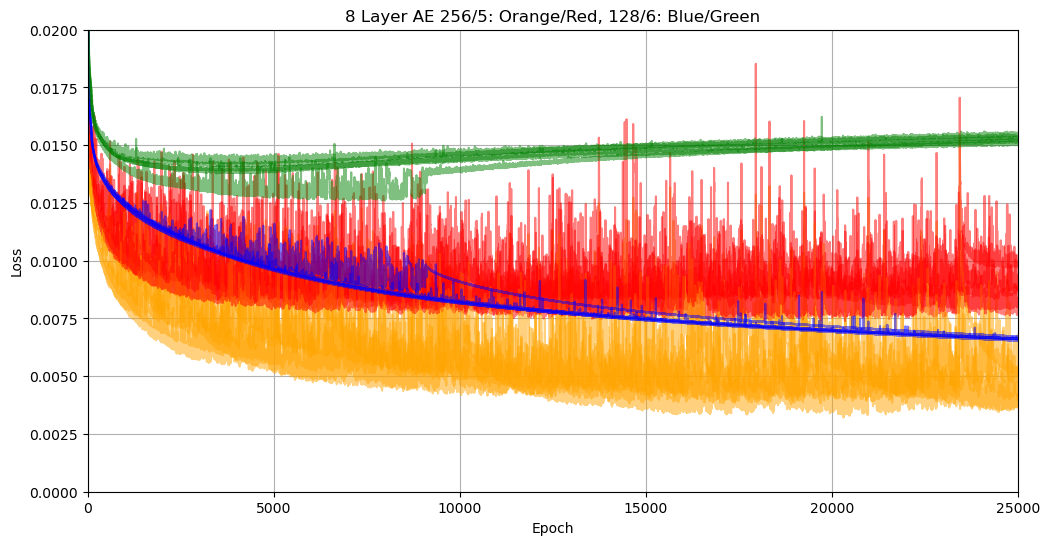

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_256_LR_5/8_Layer_AE_Default_Data'
loss_color_1 = 'orange'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_128_LR_6/8_Layer_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'green'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# Adjust plot limits and labels as desired
plt.title('8 Layer AE 256/5: Orange/Red, 128/6: Blue/Green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# 7 Layer Model

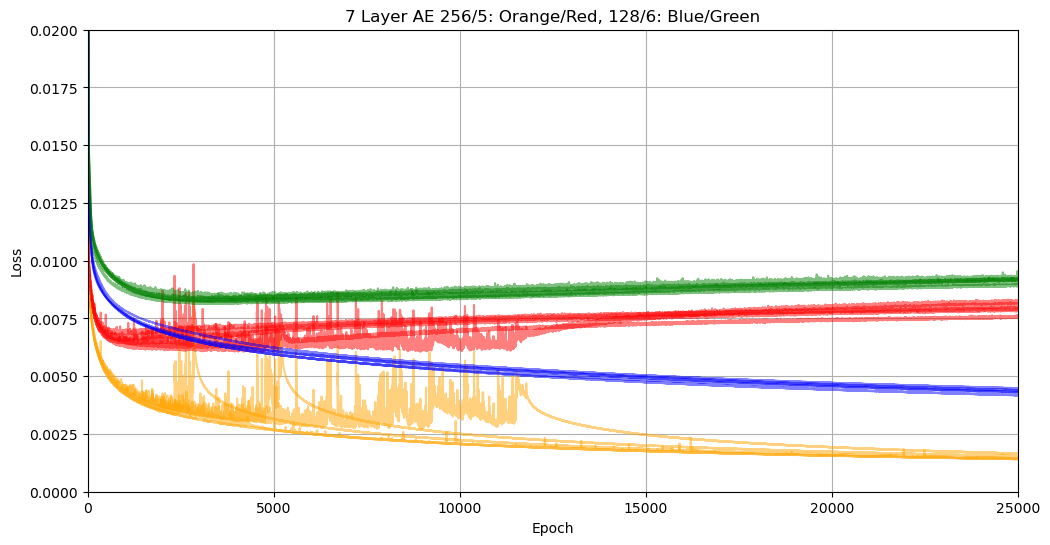

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_256_LR_5/7_Layer_AE_Default_Data'
loss_color_1 = 'orange'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_128_LR_6/7_Layer_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'green'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# Adjust plot limits and labels as desired
plt.title('7 Layer AE 256/5: Orange/Red, 128/6: Blue/Green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# 6 Layer Model (Default)

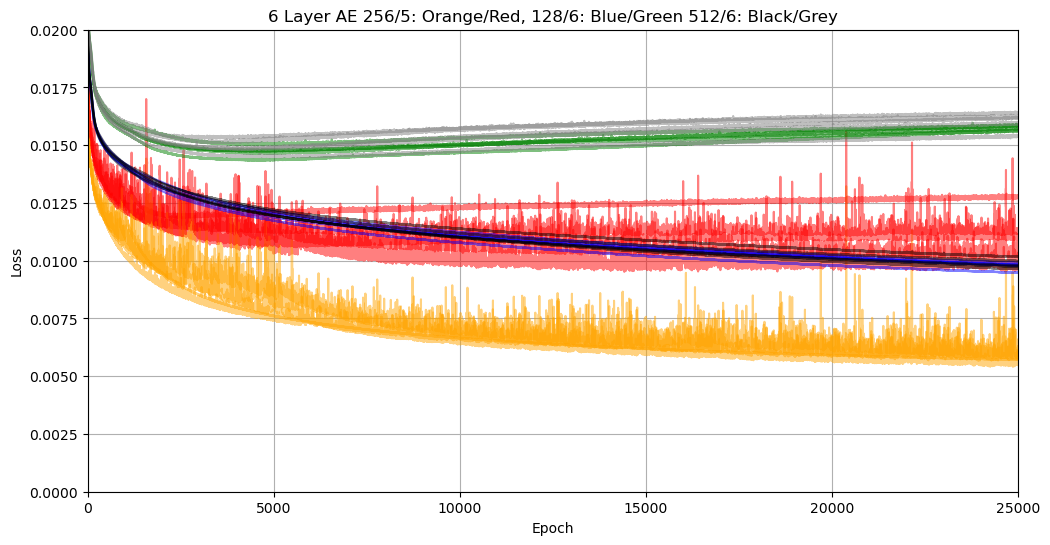

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_256_LR_5/Default_AE_Default_Data'
loss_color_1 = 'orange'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_128_LR_6/Default_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'green'

# ========== Third Autoencoder Settings ==========
base_folder_3 = 'AE_Grid_BS_512_LR_6/Default_AE_Default_Data'
loss_color_3 = 'black'
val_color_3 = 'gray'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# ----- Plot the third autoencoder -----
load_and_plot_ae(base_folder_3, loss_color_3, val_color_3, label_prefix='AE_3')

# Adjust plot limits and labels as desired
plt.title('6 Layer AE 256/5: Orange/Red, 128/6: Blue/Green 512/6: Black/Grey')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# 5 Layer Model

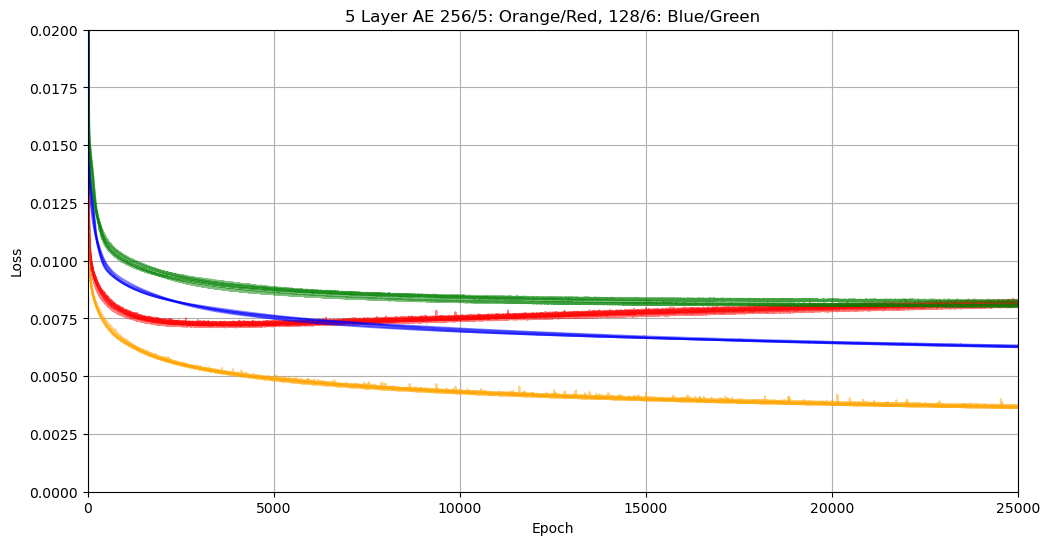

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_256_LR_5/5_Layer_AE_Default_Data'
loss_color_1 = 'orange'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_128_LR_6/5_Layer_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'green'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# Adjust plot limits and labels as desired
plt.title('5 Layer AE 256/5: Orange/Red, 128/6: Blue/Green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# 4 Layer Model

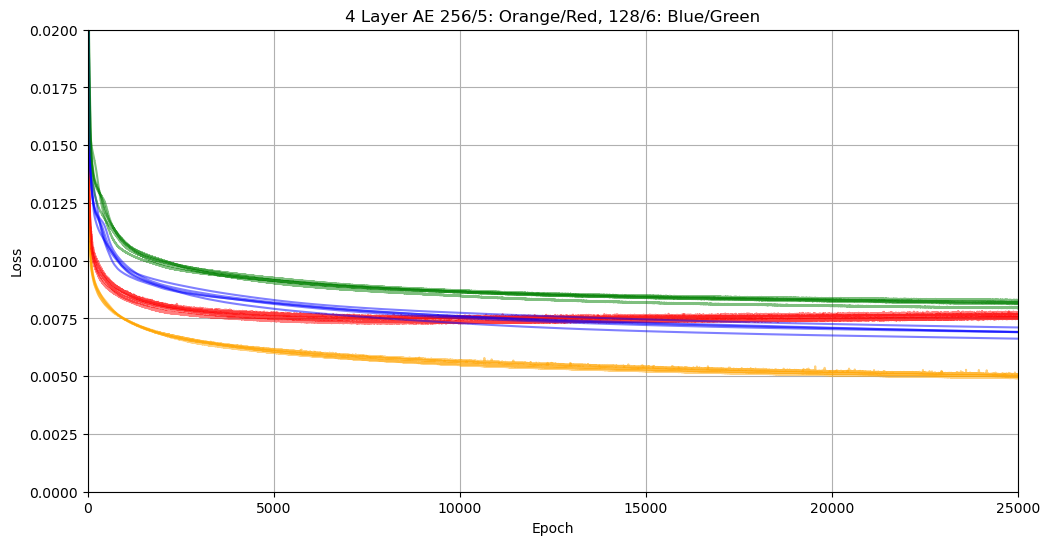

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_256_LR_5/4_Layer_AE_Default_Data'
loss_color_1 = 'orange'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_128_LR_6/4_Layer_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'green'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# Adjust plot limits and labels as desired
plt.title('4 Layer AE 256/5: Orange/Red, 128/6: Blue/Green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# 4x Node Model

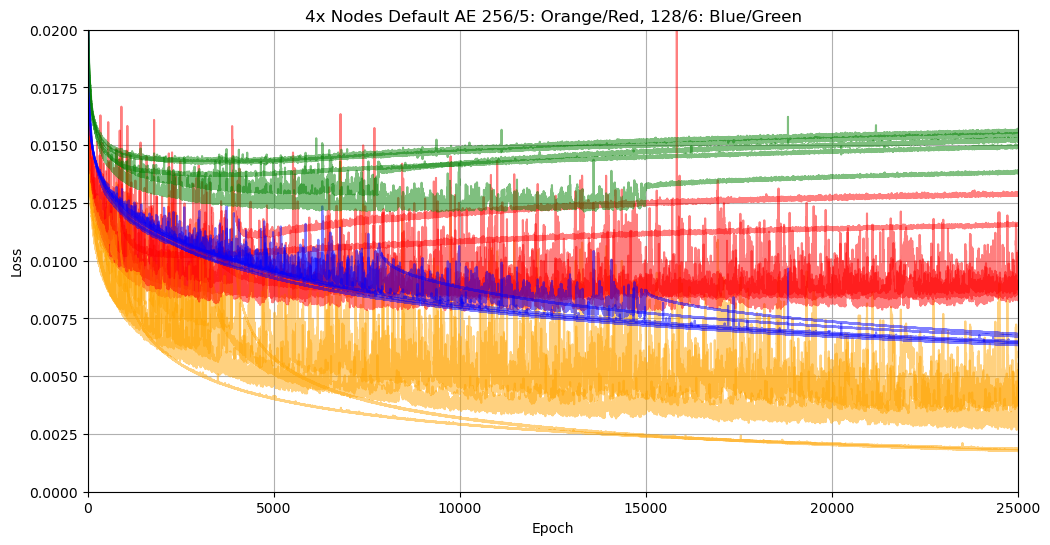

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_256_LR_5/4x_Nodes_AE_Default_Data'
loss_color_1 = 'orange'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_128_LR_6/4x_Nodes_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'green'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# Adjust plot limits and labels as desired
plt.title('4x Nodes Default AE 256/5: Orange/Red, 128/6: Blue/Green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# 2x Node Model

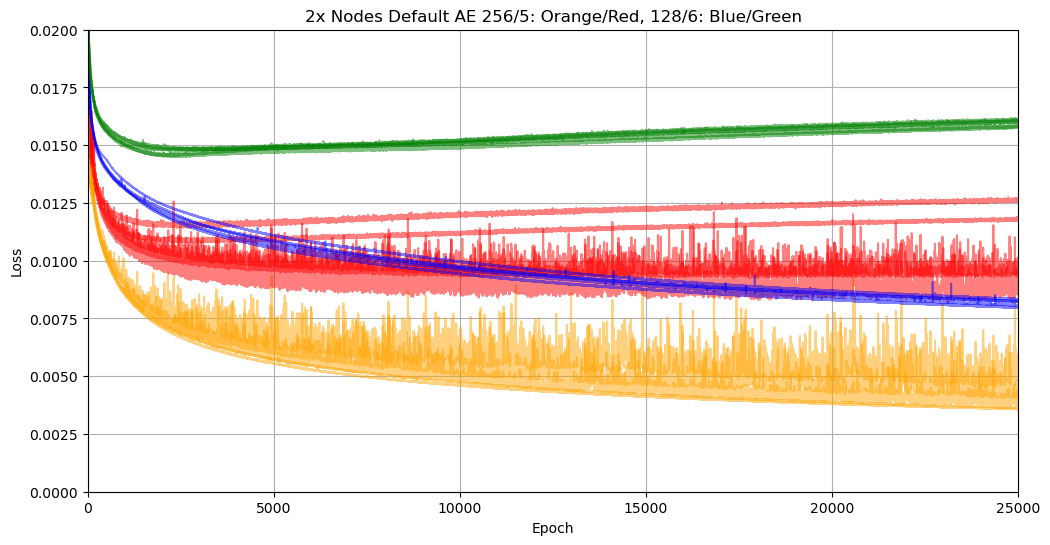

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_256_LR_5/2x_Nodes_AE_Default_Data'
loss_color_1 = 'orange'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_128_LR_6/2x_Nodes_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'green'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# Adjust plot limits and labels as desired
plt.title('2x Nodes Default AE 256/5: Orange/Red, 128/6: Blue/Green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# 0.5x Node Model

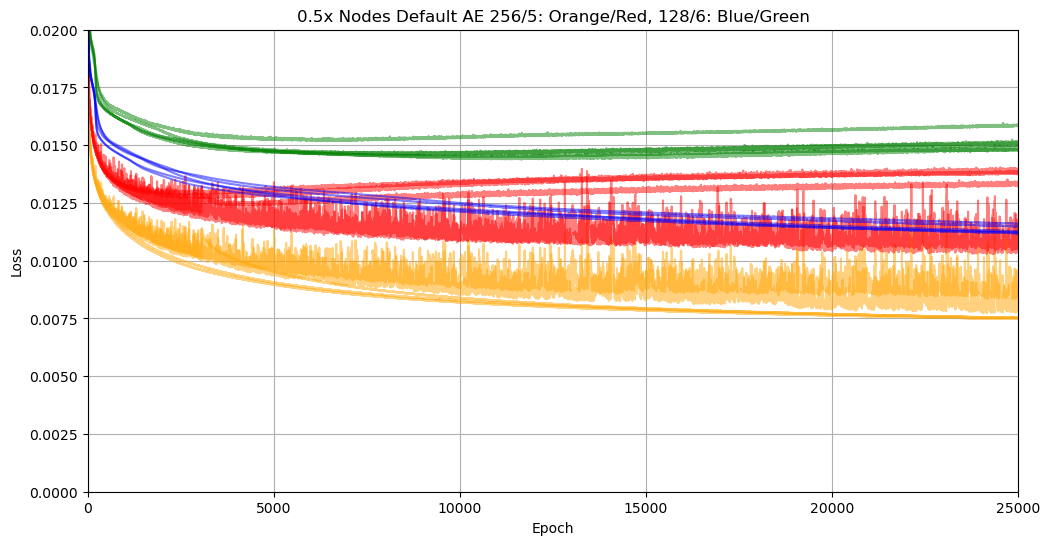

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_256_LR_5/Half_Nodes_AE_Default_Data'
loss_color_1 = 'orange'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_128_LR_6/Half_Nodes_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'green'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# Adjust plot limits and labels as desired
plt.title('0.5x Nodes Default AE 256/5: Orange/Red, 128/6: Blue/Green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# 0.25x Node Model

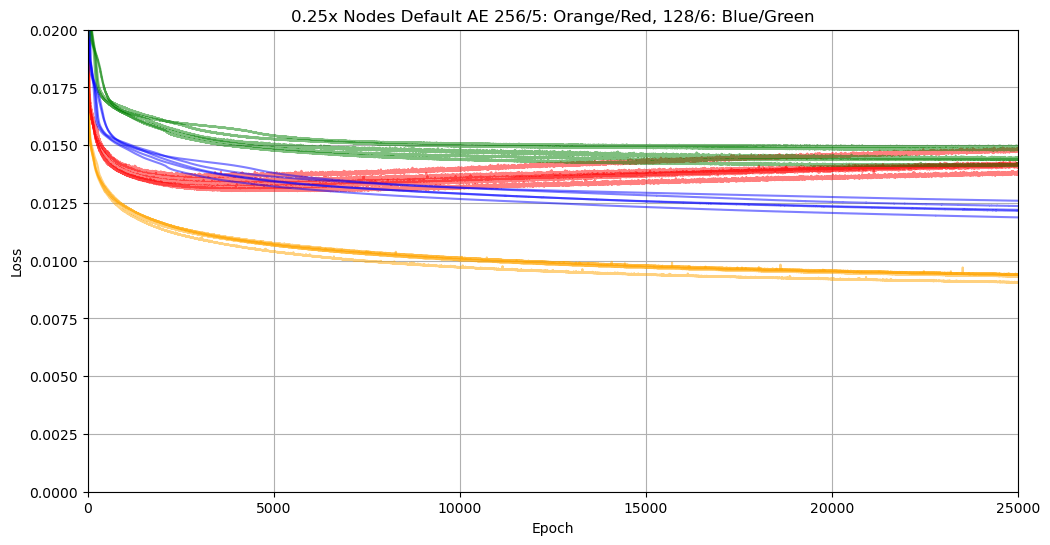

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_256_LR_5/Fourth_Nodes_AE_Default_Data'
loss_color_1 = 'orange'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_128_LR_6/Fourth_Nodes_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'green'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# Adjust plot limits and labels as desired
plt.title('0.25x Nodes Default AE 256/5: Orange/Red, 128/6: Blue/Green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# Comparing AE Structures:

# Compare Number of Layers

# BS 256, LR 10^-5

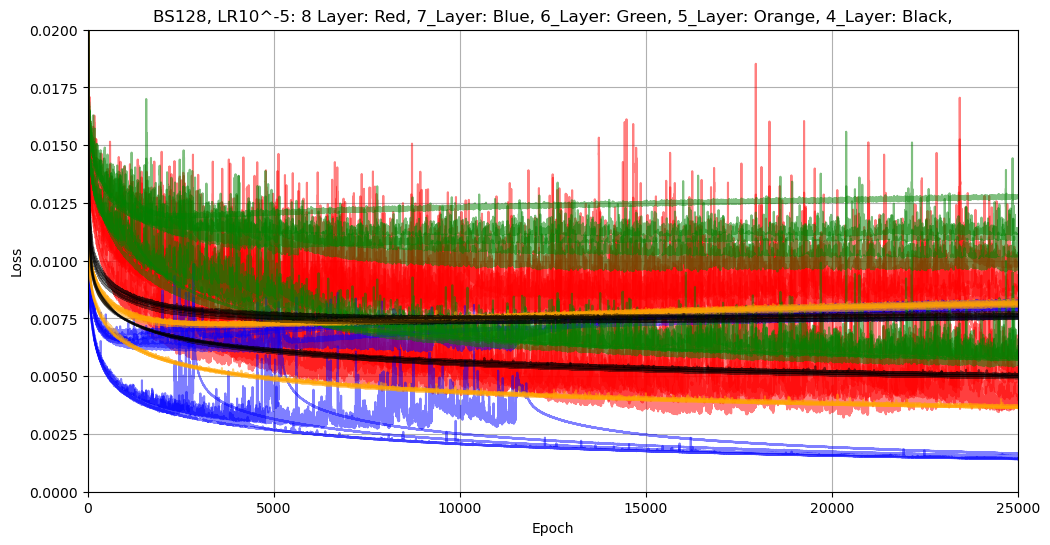

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_256_LR_5/8_Layer_AE_Default_Data'
loss_color_1 = 'red'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_256_LR_5/7_Layer_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'blue'

# ========== Third Autoencoder Settings ==========
base_folder_3 = 'AE_Grid_BS_256_LR_5/Default_AE_Default_Data'
loss_color_3 = 'green'
val_color_3 = 'green'

# ========== Fourth Autoencoder Settings ==========
base_folder_4 = 'AE_Grid_BS_256_LR_5/5_Layer_AE_Default_Data'
loss_color_4 = 'orange'
val_color_4 = 'orange'

# ========== Fifth Autoencoder Settings ==========
base_folder_5 = 'AE_Grid_BS_256_LR_5/4_Layer_AE_Default_Data'
loss_color_5 = 'Black'
val_color_5 = 'Black'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# ----- Plot the third autoencoder -----
load_and_plot_ae(base_folder_3, loss_color_3, val_color_3, label_prefix='AE_3')

# ----- Plot the fourth autoencoder -----
load_and_plot_ae(base_folder_4, loss_color_4, val_color_4, label_prefix='AE_4')

# ----- Plot the fifth autoencoder -----
load_and_plot_ae(base_folder_5, loss_color_5, val_color_5, label_prefix='AE_5')

# Adjust plot limits and labels as desired
plt.title('BS256, LR10^-5: 8 Layer: Red, 7_Layer: Blue, 6_Layer: Green, 5_Layer: Orange, 4_Layer: Black,')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# BS 128, LR 10^-6

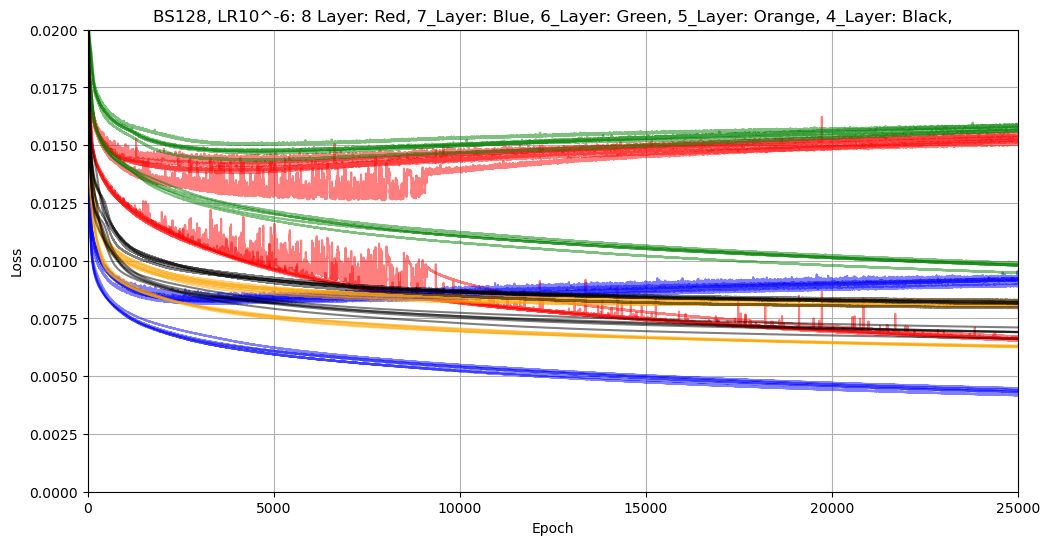

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_128_LR_6/8_Layer_AE_Default_Data'
loss_color_1 = 'red'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_128_LR_6/7_Layer_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'blue'

# ========== Third Autoencoder Settings ==========
base_folder_3 = 'AE_Grid_BS_128_LR_6/Default_AE_Default_Data'
loss_color_3 = 'green'
val_color_3 = 'green'

# ========== Fourth Autoencoder Settings ==========
base_folder_4 = 'AE_Grid_BS_128_LR_6/5_Layer_AE_Default_Data'
loss_color_4 = 'orange'
val_color_4 = 'orange'

# ========== Fifth Autoencoder Settings ==========
base_folder_5 = 'AE_Grid_BS_128_LR_6/4_Layer_AE_Default_Data'
loss_color_5 = 'Black'
val_color_5 = 'Black'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# ----- Plot the third autoencoder -----
load_and_plot_ae(base_folder_3, loss_color_3, val_color_3, label_prefix='AE_3')

# ----- Plot the fourth autoencoder -----
load_and_plot_ae(base_folder_4, loss_color_4, val_color_4, label_prefix='AE_4')

# ----- Plot the fifth autoencoder -----
load_and_plot_ae(base_folder_5, loss_color_5, val_color_5, label_prefix='AE_5')

# Adjust plot limits and labels as desired
plt.title('BS128, LR10^-6: 8 Layer: Red, 7_Layer: Blue, 6_Layer: Green, 5_Layer: Orange, 4_Layer: Black,')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# Compare Number of Nodes

# BS 256, LR 10^-5

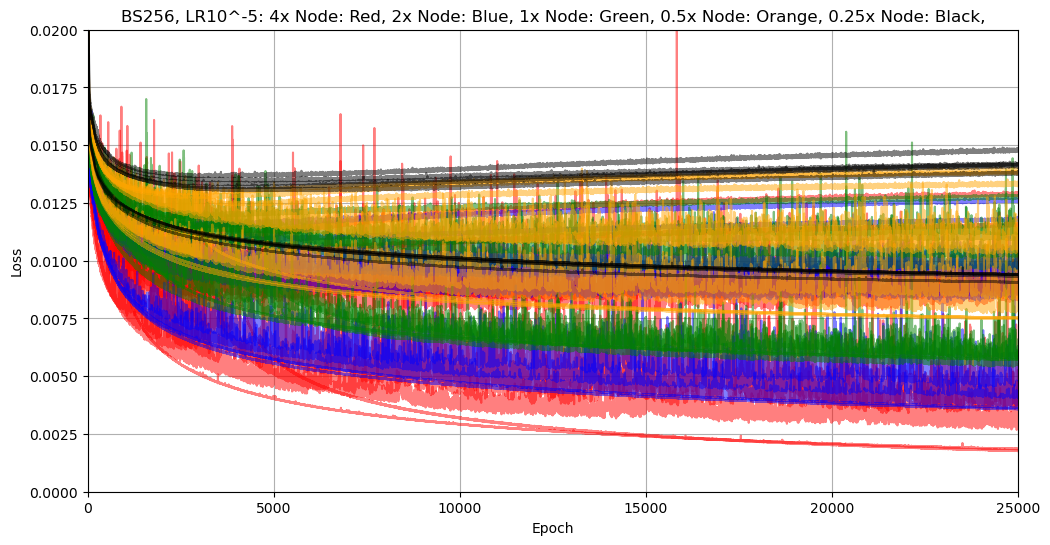

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_256_LR_5/4x_Nodes_AE_Default_Data'
loss_color_1 = 'red'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_256_LR_5/2x_Nodes_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'blue'

# ========== Third Autoencoder Settings ==========
base_folder_3 = 'AE_Grid_BS_256_LR_5/Default_AE_Default_Data'
loss_color_3 = 'green'
val_color_3 = 'green'

# ========== Fourth Autoencoder Settings ==========
base_folder_4 = 'AE_Grid_BS_256_LR_5/Half_Nodes_AE_Default_Data'
loss_color_4 = 'orange'
val_color_4 = 'orange'

# ========== Fifth Autoencoder Settings ==========
base_folder_5 = 'AE_Grid_BS_256_LR_5/Fourth_Nodes_AE_Default_Data'
loss_color_5 = 'Black'
val_color_5 = 'Black'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5,
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# ----- Plot the third autoencoder -----
load_and_plot_ae(base_folder_3, loss_color_3, val_color_3, label_prefix='AE_3')

# ----- Plot the fourth autoencoder -----
load_and_plot_ae(base_folder_4, loss_color_4, val_color_4, label_prefix='AE_4')

# ----- Plot the fifth autoencoder -----
load_and_plot_ae(base_folder_5, loss_color_5, val_color_5, label_prefix='AE_5')

# Adjust plot limits and labels as desired
plt.title('BS256, LR10^-5: 4x Node: Red, 2x Node: Blue, 1x Node: Green, 0.5x Node: Orange, 0.25x Node: Black,')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# BS 128, LR 10^-6

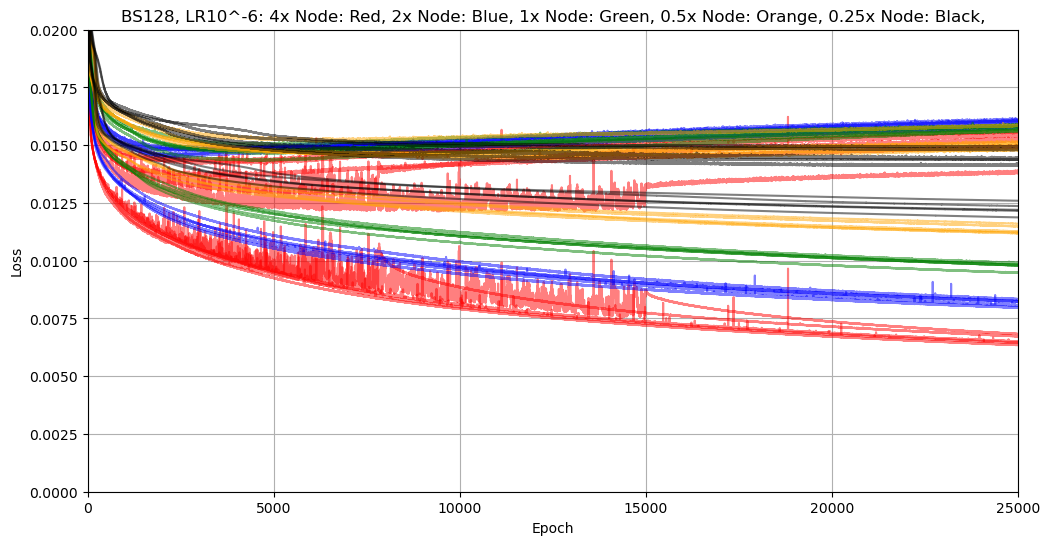

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========== First Autoencoder Settings ==========
base_folder_1 = 'AE_Grid_BS_128_LR_6/4x_Nodes_AE_Default_Data'
loss_color_1 = 'red'
val_color_1 = 'red'

# ========== Second Autoencoder Settings ==========
base_folder_2 = 'AE_Grid_BS_128_LR_6/2x_Nodes_AE_Default_Data'
loss_color_2 = 'blue'
val_color_2 = 'blue'

# ========== Third Autoencoder Settings ==========
base_folder_3 = 'AE_Grid_BS_128_LR_6/Default_AE_Default_Data'
loss_color_3 = 'green'
val_color_3 = 'green'

# ========== Fourth Autoencoder Settings ==========
base_folder_4 = 'AE_Grid_BS_128_LR_6/Half_Nodes_AE_Default_Data'
loss_color_4 = 'orange'
val_color_4 = 'orange'

# ========== Fifth Autoencoder Settings ==========
base_folder_5 = 'AE_Grid_BS_128_LR_6/Fourth_Nodes_AE_Default_Data'
loss_color_5 = 'Black'
val_color_5 = 'Black'

# Number of trials per autoencoder
num_trials = 5
# Number of files (counts) per trial (adjust if needed)
num_files_per_trial = 25

plt.figure(figsize=(12, 6))

# ----- Function to load and plot one autoencoder's trials -----
def load_and_plot_ae(base_folder, loss_color, val_color, label_prefix):
    for trial in range(1, num_trials + 1):
        loss_data_folder = os.path.join(base_folder, f'AE_Training_{trial}/AE_Training_Loss_Data')
        all_loss = []
        all_val_loss = []

        # Load all training loss data for the current trial
        for count in range(num_files_per_trial):
            history_file_path = os.path.join(loss_data_folder, f"{count}_Autoencoder_Training_History.pkl")
            if os.path.exists(history_file_path):
                history = pd.read_pickle(history_file_path)
                all_loss.extend(history['loss'].tolist())
                all_val_loss.extend(history['val_loss'].tolist())
            else:
                print(f"Warning: Missing file for count {count} in trial {trial}")

        # Plot
        epochs = list(range(len(all_loss)))
        plt.plot(epochs, all_loss, color=loss_color, alpha=0.5, 
                 label=f'{label_prefix} Trial {trial} Loss')
        plt.plot(epochs, all_val_loss, color=val_color, alpha=0.5, 
                 label=f'{label_prefix} Trial {trial} Validation Loss')

# ----- Plot the first autoencoder -----
load_and_plot_ae(base_folder_1, loss_color_1, val_color_1, label_prefix='AE_1')

# ----- Plot the second autoencoder -----
load_and_plot_ae(base_folder_2, loss_color_2, val_color_2, label_prefix='AE_2')

# ----- Plot the third autoencoder -----
load_and_plot_ae(base_folder_3, loss_color_3, val_color_3, label_prefix='AE_3')

# ----- Plot the fourth autoencoder -----
load_and_plot_ae(base_folder_4, loss_color_4, val_color_4, label_prefix='AE_4')

# ----- Plot the fifth autoencoder -----
load_and_plot_ae(base_folder_5, loss_color_5, val_color_5, label_prefix='AE_5')

# Adjust plot limits and labels as desired
plt.title('BS128, LR10^-6: 4x Node: Red, 2x Node: Blue, 1x Node: Green, 0.5x Node: Orange, 0.25x Node: Black,')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 25000)
plt.ylim(0, 0.02)
# plt.legend()
plt.grid()
plt.show()

# Additional Analysis

In [25]:
import os
import numpy as np
import pandas as pd
from scipy.stats import rankdata

# =============== Configuration ===============

base_folders = [
    'AE_Grid_BS_128_LR_6',
    'AE_Grid_BS_256_LR_5'
]

ae_folders = [
    '8_Layer_AE_Default_Data',
    '7_Layer_AE_Default_Data',
    'Default_AE_Default_Data',
    '5_Layer_AE_Default_Data',
    '4_Layer_AE_Default_Data',
    '4x_Nodes_AE_Default_Data',
    '2x_Nodes_AE_Default_Data',
    'Half_Nodes_AE_Default_Data',
    'Fourth_Nodes_AE_Default_Data'
]

num_trials = 5            # each AE is run 5 times
num_history_files = 25    # each trial has up to 25 .pkl files
first_epoch_to_ignore = 1000  # first 1000 epochs excluded from difference & stability

# =============== Helper Functions ===============

def load_training_data(folder_path, num_files=25):
    """
    Loads and concatenates 'loss' and 'val_loss' from .pkl history files in `folder_path`.
    Returns two lists: all_loss, all_val_loss.
    """
    all_loss = []
    all_val_loss = []
    for i in range(num_files):
        file_path = os.path.join(folder_path, f"{i}_Autoencoder_Training_History.pkl")
        if os.path.exists(file_path):
            history = pd.read_pickle(file_path)
            all_loss.extend(history['loss'].tolist())
            all_val_loss.extend(history['val_loss'].tolist())
        else:
            print(f"Warning: Missing file: {file_path}")
    return all_loss, all_val_loss

def compute_metrics(train_loss, val_loss, ignore_first=1000):
    """
    Compute the three metrics for scoring:
      - M1: average difference (val_loss - train_loss), ignoring first `ignore_first` epochs
      - M2: standard deviation of the combined [train_loss, val_loss] after ignoring first `ignore_first` epochs
      - M3: smallest sum of (train_loss + val_loss) across all epochs (by default we include all epochs here)
    Returns (M1, M2, M3).
    """
    # Safety check: if the total length is shorter than ignore_first, handle accordingly
    if len(train_loss) <= ignore_first:
        # No epochs left to average for M1 or M2 → might set them to some large default
        # but in practice, you should ensure your training runs are longer than 1000 epochs.
        M1 = float('inf')
        M2 = float('inf')
    else:
        diff = np.array(val_loss[ignore_first:]) - np.array(train_loss[ignore_first:])
        M1 = np.mean(diff)  # average difference
        combined = np.concatenate([
            np.array(train_loss[ignore_first:]),
            np.array(val_loss[ignore_first:])
        ])
        M2 = np.std(combined)  # standard deviation of combined losses

    # M3: smallest sum across *all* epochs
    # If you want to exclude first 1000 epochs, just slice train_loss[ignore_first:] similarly.
    sum_ = np.array(train_loss) + np.array(val_loss)
    M3 = np.min(sum_)

    return M1, M2, M3

# =============== Main Scoring Logic ===============
# We'll store a list of dictionaries with all the info for final ranking and display.

results = []

for base_folder in base_folders:
    for ae_folder in ae_folders:
        for trial in range(1, num_trials + 1):
            # Path to the trial's data
            loss_data_folder = os.path.join(
                base_folder,
                ae_folder,
                f'AE_Training_{trial}',
                'AE_Training_Loss_Data'
            )

            train_loss, val_loss = load_training_data(loss_data_folder, num_history_files)
            
            # Skip if no data loaded
            if not train_loss or not val_loss:
                print(f"No data found for: {base_folder} | {ae_folder} | Trial {trial}")
                continue

            M1, M2, M3 = compute_metrics(train_loss, val_loss, ignore_first=first_epoch_to_ignore)

            # Record the results in a dictionary
            results.append({
                'BaseFolder': base_folder,
                'AEFolder': ae_folder,
                'Trial': trial,
                'M1_Diff': M1,
                'M2_Stability': M2,
                'M3_Sum': M3
            })

# Convert results to a DataFrame for easy manipulation
df = pd.DataFrame(results)

# --------------------------------------------------
# Step 1: Rank each metric across *all rows*.
# Smaller M1 is better, smaller M2 is better, smaller M3 is better.
# We'll do standard ascending rank for all metrics.
# --------------------------------------------------
df['Rank_M1'] = rankdata(df['M1_Diff'], method='min')
df['Rank_M2'] = rankdata(df['M2_Stability'], method='min')
df['Rank_M3'] = rankdata(df['M3_Sum'], method='min')

# Integrated Score = sum of the ranks; lower = better
df['Integrated_Score'] = df['Rank_M1'] + df['Rank_M2'] + df['Rank_M3']

# --------------------------------------------------
# Step 2: Print or display the final DataFrame
# --------------------------------------------------
# First, show a summary of each metric side by side
print("=== Per-Trial Scores (Individual Metrics) ===")
print(df[['BaseFolder', 'AEFolder', 'Trial', 'M1_Diff', 'M2_Stability', 'M3_Sum']])

# Then, show the ranks + integrated score
print("\n=== Per-Trial Ranks & Integrated Score ===")
print(df[['BaseFolder', 'AEFolder', 'Trial', 'Rank_M1', 'Rank_M2', 'Rank_M3', 'Integrated_Score']])

# Finally, sort by best integrated score (ascending) so you can see top performers
df_sorted = df.sort_values(by='Integrated_Score')
print("\n=== Trials Sorted by Integrated Score (Best to Worst) ===")
print(df_sorted[['BaseFolder', 'AEFolder', 'Trial', 'M1_Diff', 'M2_Stability', 'M3_Sum',
                 'Rank_M1', 'Rank_M2', 'Rank_M3', 'Integrated_Score']])


# Finally, sort by best integrated score (ascending) so you can see top performers
df_sorted = df.sort_values(by='Integrated_Score')

# Specify all the columns you want in the final table:
columns_to_save = [
    'BaseFolder',
    'AEFolder',
    'Trial',
    'M1_Diff',
    'M2_Stability',
    'M3_Sum',
    'Rank_M1',
    'Rank_M2',
    'Rank_M3',
    'Integrated_Score'
]

# Print it to the console (optional)
print("\n=== Trials Sorted by Integrated Score (Best to Worst) ===")
print(df_sorted[columns_to_save])

# Save as CSV (no index column in the file)
output_filename = 'AE_Grid_Test_Loss_VLoss_Rankings.csv'
df_sorted[columns_to_save].to_csv(output_filename, index=False)

print(f"\nFinal ranking results saved to {output_filename}")

=== Per-Trial Scores (Individual Metrics) ===
             BaseFolder                      AEFolder  Trial   M1_Diff  \
0   AE_Grid_BS_128_LR_6       8_Layer_AE_Default_Data      1  0.006397   
1   AE_Grid_BS_128_LR_6       8_Layer_AE_Default_Data      2  0.005625   
2   AE_Grid_BS_128_LR_6       8_Layer_AE_Default_Data      3  0.006362   
3   AE_Grid_BS_128_LR_6       8_Layer_AE_Default_Data      4  0.006637   
4   AE_Grid_BS_128_LR_6       8_Layer_AE_Default_Data      5  0.006658   
..                  ...                           ...    ...       ...   
85  AE_Grid_BS_256_LR_5  Fourth_Nodes_AE_Default_Data      1  0.004066   
86  AE_Grid_BS_256_LR_5  Fourth_Nodes_AE_Default_Data      2  0.003870   
87  AE_Grid_BS_256_LR_5  Fourth_Nodes_AE_Default_Data      3  0.003743   
88  AE_Grid_BS_256_LR_5  Fourth_Nodes_AE_Default_Data      4  0.003667   
89  AE_Grid_BS_256_LR_5  Fourth_Nodes_AE_Default_Data      5  0.003263   

    M2_Stability    M3_Sum  
0       0.003365  0.021784  
1      